In [17]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [18]:
import nltk

In [19]:
all_files = glob.glob("./data_list/my*.xls")
all_files

['./data_list/myCabinetExcelData (4).xls',
 './data_list/myCabinetExcelData (8).xls',
 './data_list/myCabinetExcelData (9).xls',
 './data_list/myCabinetExcelData (5).xls',
 './data_list/myCabinetExcelData (2).xls',
 './data_list/myCabinetExcelData (3).xls',
 './data_list/myCabinetExcelData (6).xls',
 './data_list/myCabinetExcelData (7).xls']

In [20]:
all_files_data = [] #저장할 리스트

In [21]:
for file in all_files:
    data_frame = pd.read_excel(file)
    # print(data_frame)
    all_files_data.append(data_frame)
    
print(len(all_files_data))

8


In [22]:
all_files_data  #출력하여 내용 확인

[    Unnamed: 0   번호                                                 제목  \
 0          NaN    1                  Big data promises big opportunity   
 1          NaN    2  Big data vs accurate data in health research: ...   
 2          NaN    3  Data stream classification and big data analytics   
 3          NaN    4  Big Data and Privacy: Why Public Organizations...   
 4          NaN    5  Big data on individuals in the architectural d...   
 ..         ...  ...                                                ...   
 95         NaN   96  Big data analytics sentiment: US-China reactio...   
 96         NaN   97  Big Data In the first of three articles on Big...   
 97         NaN   98  Big data driven lithium-ion battery modeling m...   
 98         NaN   99  Big data in multiple sclerosis: development of...   
 99         NaN  100  Data Fusion of Small Sample Flying Test Data a...   
 
                                                    저자  \
 0                                      

In [23]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data promises big opportunity,"Davis, B.",INSTITUTE OF PETROLEUM,2014
1,NaN,2,Big data vs accurate data in health research: ...,"Brodie, M.A.; Pliner, E.M.; Ho, A.; Li, Kalina...","Elsevier Science B.V., Amsterdam",2018
2,NaN,3,Data stream classification and big data analytics,"Krawczyk, B.; Stefanowski, J.; Wozniak, M.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,Big Data and Privacy: Why Public Organizations...,"Prince, Christopher",University of Toronto Press; 1998,2017
4,NaN,5,Big data on individuals in the architectural d...,"Meekings, Scott; Schnabel, Marc Aurel",Taylor & Francis,2017
...,...,...,...,...,...,...
795,NaN,96,Efficient data management tools for the hetero...,"Alekseev, A. A.; Osipova, V. V.; Ivanov, M. A....",Springer Science + Business Media,2016
796,NaN,97,Securing Big Data Provenance for Auditors: The...,"Appelbaum, Deniz",Strategic and Emerging Technologies Section of...,2016
797,NaN,98,Demystifying big data: Anatomy of big data dev...,"Shin, Dong-Hee","Elsevier Science B.V., Amsterdam.",2016
798,NaN,99,Assessing Whether “Big Data” Solutions Provide...,"Hertz, D.; Gavaghan, M.; Garfield, S.","Elsevier Science B.V., Amsterdam",2014


# 데이터 전처리

In [25]:
all_title = all_files_data_concat['제목']
all_title

0                      Big data promises big opportunity
1      Big data vs accurate data in health research: ...
2      Data stream classification and big data analytics
3      Big Data and Privacy: Why Public Organizations...
4      Big data on individuals in the architectural d...
                             ...                        
795    Efficient data management tools for the hetero...
796    Securing Big Data Provenance for Auditors: The...
797    Demystifying big data: Anatomy of big data dev...
798    Assessing Whether “Big Data” Solutions Provide...
799    Why Big Data Is a Big Deal A new class of data...
Name: 제목, Length: 800, dtype: object

In [30]:
# iterator data(반복자) - list, Series

In [31]:
type(all_files)

list

In [28]:
stopwords = set(stopwords.words("english"))
lemma = WordNetLemmatizer() #의미있는 단어, 표제어 추출하기

In [32]:
words = []

In [41]:
for title in all_title:
    # print(title)
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    # print(EnWords)
    EnWordsToken = word_tokenize(EnWords.lower())
    # print(EnWordsToken)
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopwords]  #익명함수, 클로저
    # print(EnWordsTokenStop)
    
    # [파이썬 초급] 리스트 컴프리헨션(list comprehension)
    # def call(EnWordsToken):
    #     result = []
    #     for w in EnWordsToken:
    #         if w not in stopwords:
    #             result.append(w)
    #     return result
    
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    
    # def call2(EnWordsTokenStop):
    #     result2 = []
    #     for w2 in EnWordsTokenStop:
    #         result2.append(lemma.lemmatize(w2))
    #     return result2    
  
    # print(EnWordsTokenStopLemma)
    words.append(EnWordsTokenStopLemma)

In [42]:
print(words[:10])  #출력하여 내용 확인

[['big', 'data', 'promise', 'big', 'opportunity'], ['big', 'data', 'v', 'accurate', 'data', 'health', 'research', 'large', 'scale', 'physical', 'activity', 'monitoring', 'smartphones', 'wearable', 'device', 'risk', 'unconscious', 'bias'], ['data', 'stream', 'classification', 'big', 'data', 'analytics'], ['big', 'data', 'privacy', 'public', 'organization', 'adopt', 'big', 'data'], ['big', 'data', 'individual', 'architectural', 'design', 'process', 'combining', 'individual', 'data', 'architect', 'toolset'], ['big', 'data', 'operation', 'basis', 'benchmarking', 'data', 'grid'], ['big', 'data', 'benchmark', 'big', 'd'], ['big', 'data', 'ownership', 'data', 'recent', 'development', 'europe'], ['big', 'survey', 'big', 'data', 'centre'], ['big', 'data', 'approach', 'trauma', 'outcome', 'prediction', 'autonomous', 'resuscitation', 'shiming', 'yang', 'mary', 'njoku', 'colin', 'f', 'mackenzie', 'discus', 'massive', 'clinical', 'data', 'used', 'learning', 'prediction', 'model', 'level', 'trauma',

In [43]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2[:10]) #작업 내용 확인

['big', 'data', 'promise', 'big', 'opportunity', 'big', 'data', 'v', 'accurate', 'data']


In [44]:
count = Counter(words2)
count #출력하여 내용확인

Counter({'big': 3438,
         'data': 4254,
         'promise': 39,
         'opportunity': 87,
         'v': 9,
         'accurate': 3,
         'health': 87,
         'research': 102,
         'large': 45,
         'scale': 21,
         'physical': 6,
         'activity': 6,
         'monitoring': 15,
         'smartphones': 3,
         'wearable': 6,
         'device': 30,
         'risk': 33,
         'unconscious': 3,
         'bias': 9,
         'stream': 21,
         'classification': 9,
         'analytics': 303,
         'privacy': 39,
         'public': 33,
         'organization': 9,
         'adopt': 3,
         'individual': 18,
         'architectural': 3,
         'design': 42,
         'process': 54,
         'combining': 6,
         'architect': 3,
         'toolset': 3,
         'operation': 15,
         'basis': 3,
         'benchmarking': 6,
         'grid': 6,
         'benchmark': 6,
         'd': 3,
         'ownership': 3,
         'recent': 9,
         'develo

In [45]:
word_count = dict()

In [47]:
count.most_common(10)

[('data', 4254),
 ('big', 3438),
 ('analytics', 303),
 ('analysis', 156),
 ('using', 135),
 ('science', 132),
 ('based', 132),
 ('management', 126),
 ('challenge', 120),
 ('system', 114)]

In [54]:
for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1):
       word_count[tag] = counts
       print("%s : %d" % (tag, counts))

data : 4254
big : 3438
analytics : 303
analysis : 156
using : 135
science : 132
based : 132
management : 126
challenge : 120
system : 114
research : 102
mining : 99
approach : 93
opportunity : 87
health : 87
new : 87
smart : 84
model : 78
small : 78
technology : 75
cloud : 75
learning : 72
information : 69
use : 66
application : 63
deal : 63
social : 63
network : 63
processing : 60
era : 60
open : 57
process : 54
healthcare : 54
driven : 54
quality : 54
computing : 51
knowledge : 51
storage : 51
framework : 51
making : 48
question : 48
world : 48
large : 45
decision : 45
business : 45
need : 45
time : 45
company : 45
efficient : 45
service : 45


In [55]:
del word_count['big']
del word_count['data']

In [57]:
word_count.keys()

dict_keys(['analytics', 'analysis', 'using', 'science', 'based', 'management', 'challenge', 'system', 'research', 'mining', 'approach', 'opportunity', 'health', 'new', 'smart', 'model', 'small', 'technology', 'cloud', 'learning', 'information', 'use', 'application', 'deal', 'social', 'network', 'processing', 'era', 'open', 'process', 'healthcare', 'driven', 'quality', 'computing', 'knowledge', 'storage', 'framework', 'making', 'question', 'world', 'large', 'decision', 'business', 'need', 'time', 'company', 'efficient', 'service'])

In [61]:
key_list = list(word_count.keys())
key_list[:10]

['analytics',
 'analysis',
 'using',
 'science',
 'based',
 'management',
 'challenge',
 'system',
 'research',
 'mining']

In [62]:
sorted_keys_list = sorted(key_list)
sorted_keys_list[:10]

['analysis',
 'analytics',
 'application',
 'approach',
 'based',
 'business',
 'challenge',
 'cloud',
 'company',
 'computing']

In [67]:
sorted_keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_keys[:10]

['analytics',
 'analysis',
 'using',
 'science',
 'based',
 'management',
 'challenge',
 'system',
 'research',
 'mining']

In [68]:
sorted_keys2 = sorted(word_count, key=word_count.get)
sorted_keys2[:10]

['large',
 'decision',
 'business',
 'need',
 'time',
 'company',
 'efficient',
 'service',
 'making',
 'question']

In [69]:
sorted_values = sorted(word_count.values(), reverse=True)
sorted_values[:10]

[303, 156, 135, 132, 132, 126, 120, 114, 102, 99]

In [70]:
dict2 = {"name" : ["홍길동", "김길동", "송길동"], "age" : [100, 200, 300]}
dict2.keys()

dict_keys(['name', 'age'])

In [76]:
dict3 = {"분석" : 245, "챌린지" : 100}

In [77]:
keys3 = dict3.keys()
keys3

dict_keys(['분석', '챌린지'])

In [72]:
dict2.values()

dict_values([['홍길동', '김길동', '송길동'], [100, 200, 300]])

In [73]:
dict3.values()

dict_values([245, 100])

In [78]:
list_keys3 = list(keys3)
list_keys3

['분석', '챌린지']

In [79]:
sorted(list_keys3, reverse=True)

['챌린지', '분석']

In [81]:
list_values3 = list(dict3.values())
sorted(list_values3, reverse=True)

[245, 100]

# 단어 빈도 히스토그램

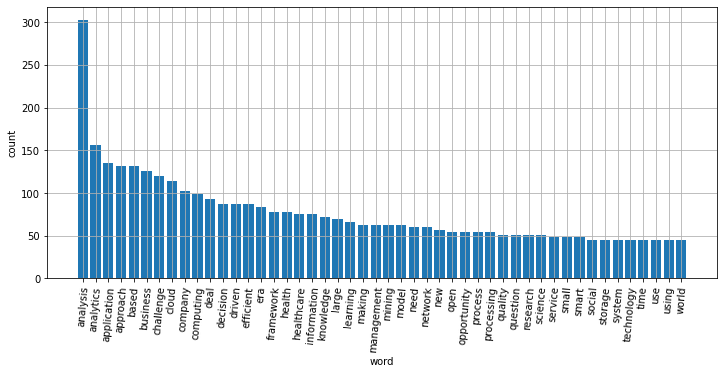

In [86]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12, 5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

plt.bar(range(len(word_count)), sorted_values)
plt.xticks(range(len(word_count)), sorted_keys_list, rotation='85')
plt.show()

([<matplotlib.axis.XTick at 0x7f909bdcf970>,
 [Text(0, 0, 'analytics'),
  Text(1, 0, 'analysis'),
  Text(2, 0, 'using'),
  Text(3, 0, 'science'),
  Text(4, 0, 'based'),
  Text(5, 0, 'management'),
  Text(6, 0, 'challenge'),
  Text(7, 0, 'system'),
  Text(8, 0, 'research'),
  Text(9, 0, 'mining'),
  Text(10, 0, 'approach'),
  Text(11, 0, 'opportunity'),
  Text(12, 0, 'health'),
  Text(13, 0, 'new'),
  Text(14, 0, 'smart'),
  Text(15, 0, 'model'),
  Text(16, 0, 'small'),
  Text(17, 0, 'technology'),
  Text(18, 0, 'cloud'),
  Text(19, 0, 'learning'),
  Text(20, 0, 'information'),
  Text(21, 0, 'use'),
  Text(22, 0, 'application'),
  Text(23, 0, 'deal'),
  Text(24, 0, 'social'),
  Text(25, 0, 'network'),
  Text(26, 0, 'processing'),
  Text(27, 0, 'era'),
  Text(28, 0, 'open'),
  Text(29, 0, 'process'),
  Text(30, 0, 'healthcare'),
  Text(31, 0, 'driven'),
  Text(32, 0, 'quality'),
  Text(33, 0, 'computing'),
  Text(34, 0, 'knowledge'),
  Text(35, 0, 'storage'),
  Text(36, 0, 'framework'),


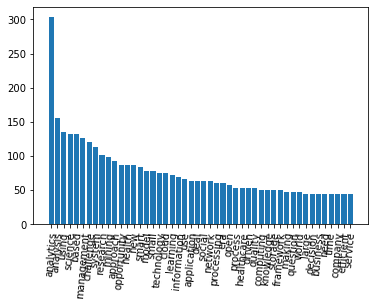

In [87]:
plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')